| <b> </b> | <b></b> |
|--|--|
| **Names** | *Fill in your names here* |
| **Group** | *Report your group number here* |


In [6]:

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import operator
import pylab
import math

pylab.rcParams['figure.figsize'] = (13.0, 10.0)


# Bayesian Decision Theory

In this lab, we will create generative models of data. The data that we will use is the same as in the lab on logistic regression, and we will create a model where we use 2-dimensional Gaussian distributions to describe the data in each class. We then use Bayes' rule to compute the probability of a datapoint belonging to a certain class.

The code below loads the data and provides you with an effective, simple to understand and simple to use implementation of the Gaussian PDF. 

So, first, let's load the data.

In [3]:
# This code is given

data = np.load("data-2c.npz")
d = data['d']
l = data['l']

colours = [ [ 'b', 'r' ][int(x)] for x in np.nditer(l)]

# Our own implementation of the multivariate Gaussian Distribution
class Gauss:
    def __init__(self, mu, sigma):
        """Initialise a distribution with mean mu and covariance sigma
        
        Precompute and store everything that is not dependent
        on the datapont, so as to keep things efficient"""
        D = mu.size
        
        self.mu = mu
        self.icov = np.linalg.inv(sigma)
        sign,ld = np.linalg.slogdet(sigma)
        if sign != 1:
            print("Sign=",sign)
        
        self.lognum = D*np.log(2*np.pi) + ld
                            
    def logprob(self,x):
        """return log(p(x))"""
        d = x-self.mu
        return -.5 * (self.lognum + np.dot(np.dot(d,self.icov),d))
    
    def prob(self,x):
        """return p(x)"""
        return np.exp(self.logprob(x)) 

<Figure size 936x720 with 0 Axes>

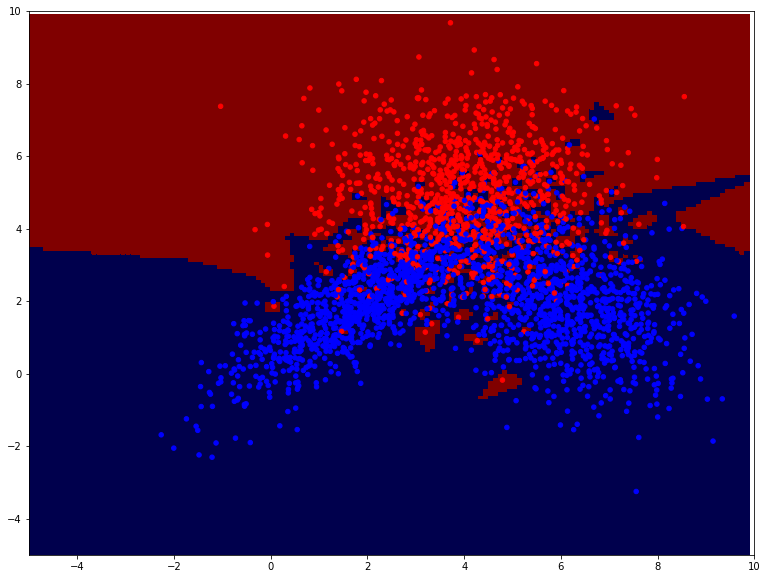

In [12]:
# Code for plotting the heat map
import time
from IPython import display

xx,yy = np.mgrid[-5:10:.1,-5:10:.1]
def plotHeat(f):
    """ Plot a heatmap for an arbitrary function"""
    display.clear_output(wait=True)
    display.display(plt.gcf())
    p = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            p[i,j] = f(xx[i,j], yy[i,j])
    plt.pcolor(xx,yy,p,cmap='seismic')
    plt.xlim([-5,10])
    plt.ylim([-5,10])
    plt.scatter(d[:,0],d[:,1],20,colours)
    time.sleep(.01)
    
def nn(x,y):
    mindist = 1e200
    bestl = 0
    for p,t in zip(d, l):
        dist = (p[0]-x)**2+(p[1]-y)**2
        if dist<mindist:
            mindist = dist
            bestl = t
    return bestl

plotHeat(nn)

## Unconstrained model

$$
\newcommand{\x}{\mathbf{x}}
\newcommand{\c}{\mathcal{C}}
\newcommand{\mean}{\boldsymbol{\mu}}
\newcommand{\cov}{\boldsymbol{\Sigma}}
$$

In this first exercise, we will create two normal distributions, one for each class. The probability density at a datapoint, given that it belongs to class one, is given by:
$$
p(\x|\c_1) = \frac{1}{\sqrt{(2\pi)^k |\cov_1|}} \exp-\frac12 (\x-\mean_1)^\top \cov_1^{-1} (\x-\mean_1)
$$
where $k$ is the dimensionality of the data (in this case, 2), $\mean_1$ is the mean of the data and $\cov_1$ is the covariance of the data. The probability density for a datapoint belonging to class two is given analogously, with its own parameters $\mean_2$ and $\cov_2$.

**Question 1 [5 credits]**
Split your dataset into 80\% training set and 20% test set. Using the train set, learn the two Gaussian distributions for the two classes. That is, implement a function to compute the sufficient statistics for the class-conditional distributions yourself. 

In [1]:
#ANSQ1



#/ANSQ1

**Question 2 [5 credits]**
Use Bayes' rule to compute $p(\c_1|\x)$. Plot the posterior using the provided heatmap code. What is the performance of the model on the test set?

<Figure size 936x720 with 0 Axes>

Accuracy: 0.855


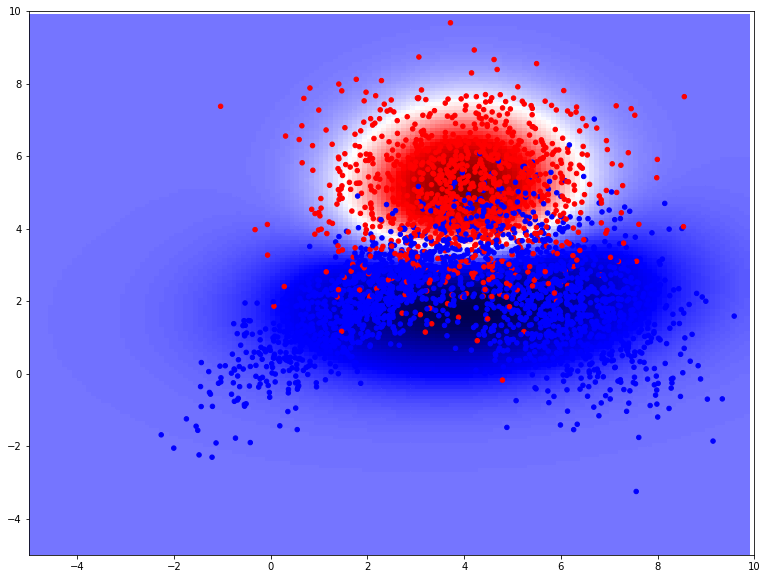

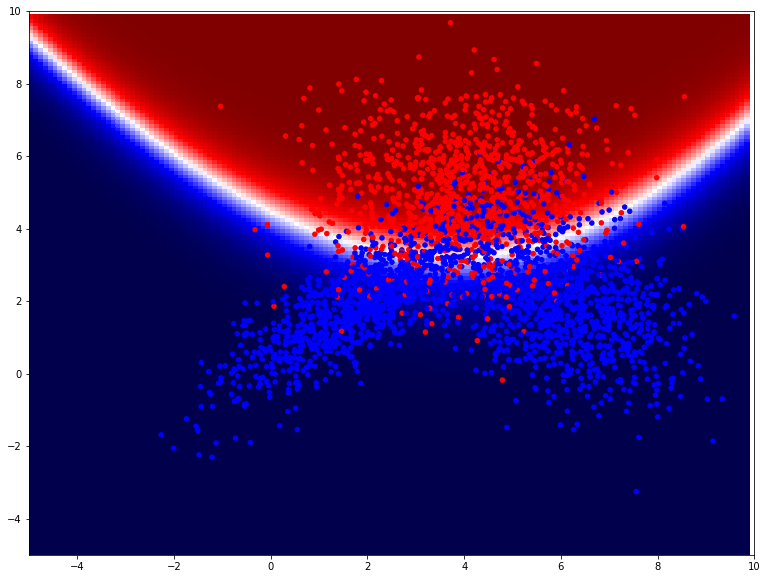

In [8]:
#ANSQ2


#/ANSQ2

## Constrained model

**Question 3 [5 credits]**
Now, let's look at a constrained model. How would you compute the means and covariances of the two classes, if you want to enforce that the covariances of the two classes are identical? Implement your answer, and plot the discriminant. What is the performance on the test set?

ANSQ3


<Figure size 936x720 with 0 Axes>

Accuracy 0.8733333333333333


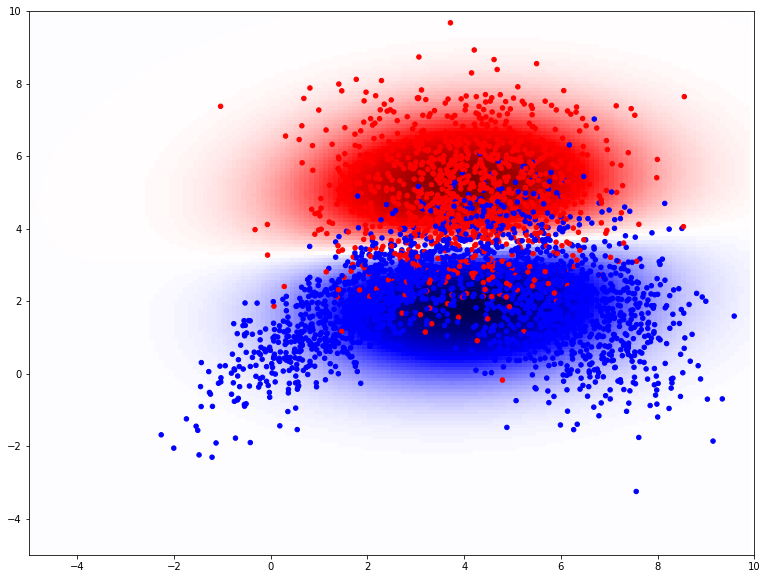

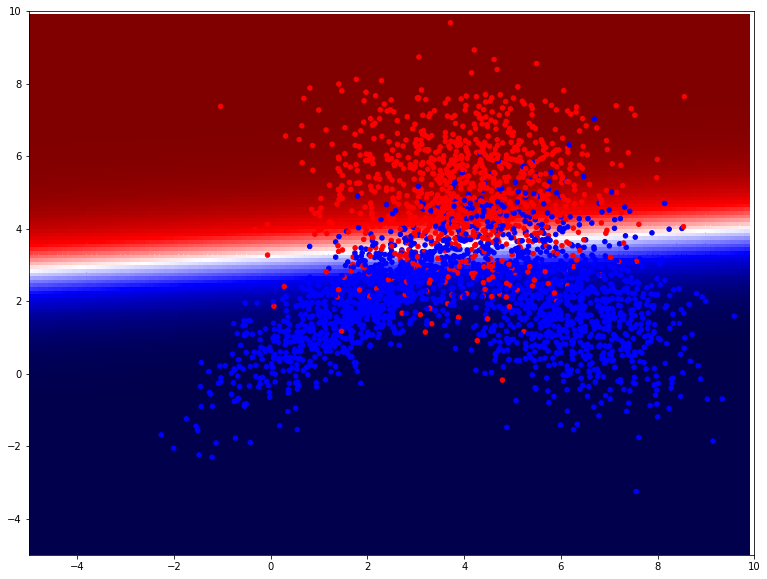

In [9]:


#/ANSQ3

**Question 4 [5 credits]**
Let us enforce a different type of constraint. The covariances of both distributions are now not identical, but each covariance is diagonal (that is, the matrix contains only variances, not co-variances). Implement this and plot the distributions overlaid on the dataset. What is the performance on the test set? What does the discriminant look like?

<Figure size 936x720 with 0 Axes>

Accuracy 0.8516666666666667


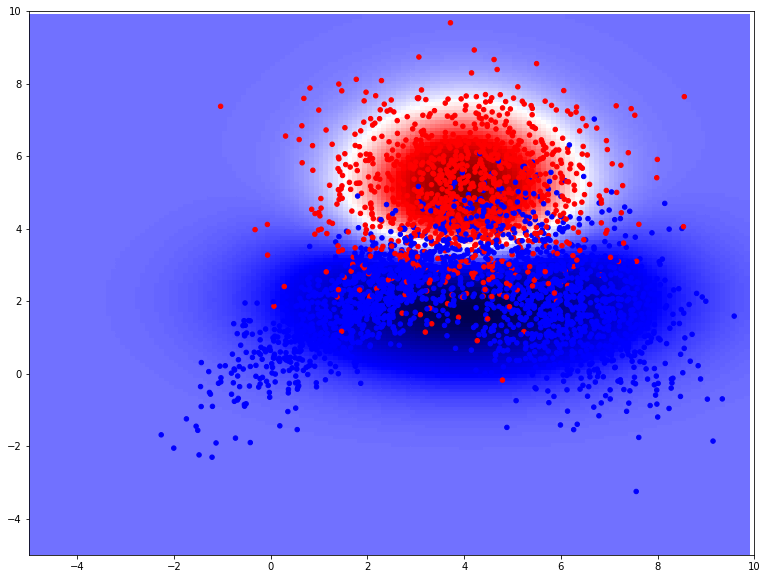

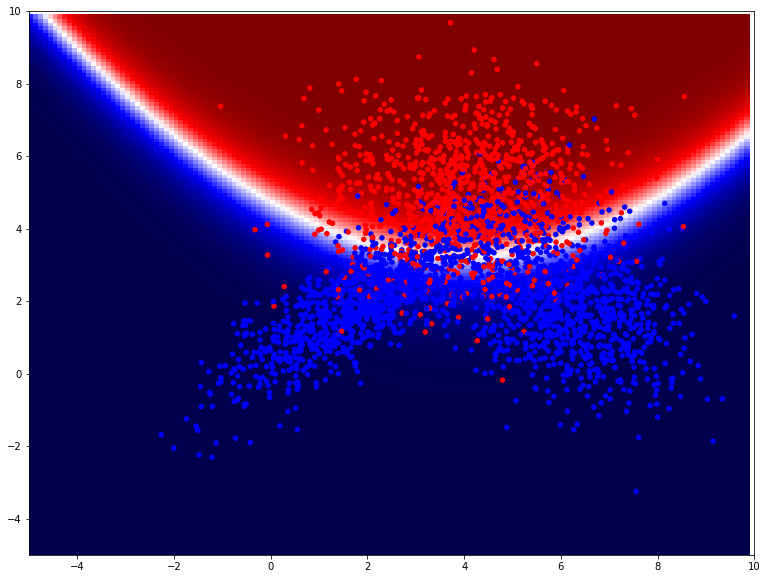

In [10]:
#ANSQ4

#/ANSQ4

**Question 5 [5 credits]**
Finally, implement and test the model where you enforce spherical covariances. That is, there are no covariance terms in the matrix, and the variances are the same along all dimensions. Plot the distributions and the discriminant, and compute the performance on the test set.

<Figure size 936x720 with 0 Axes>

Accuracy 0.855


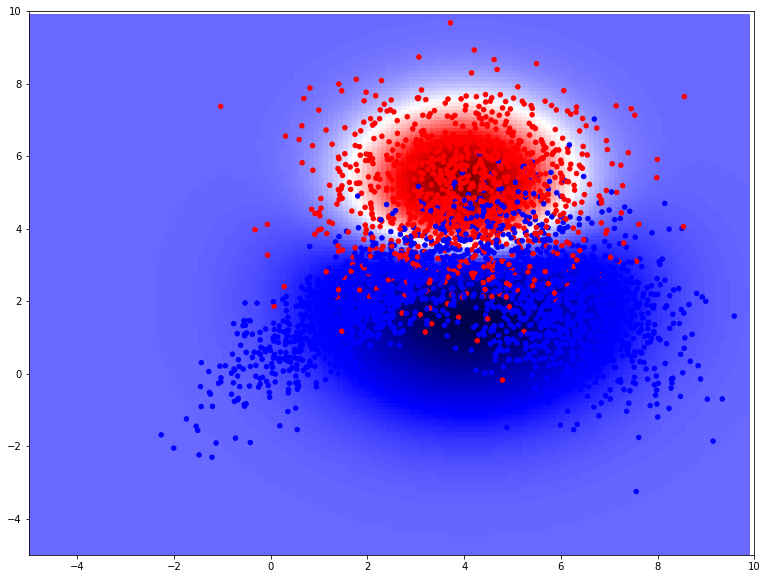

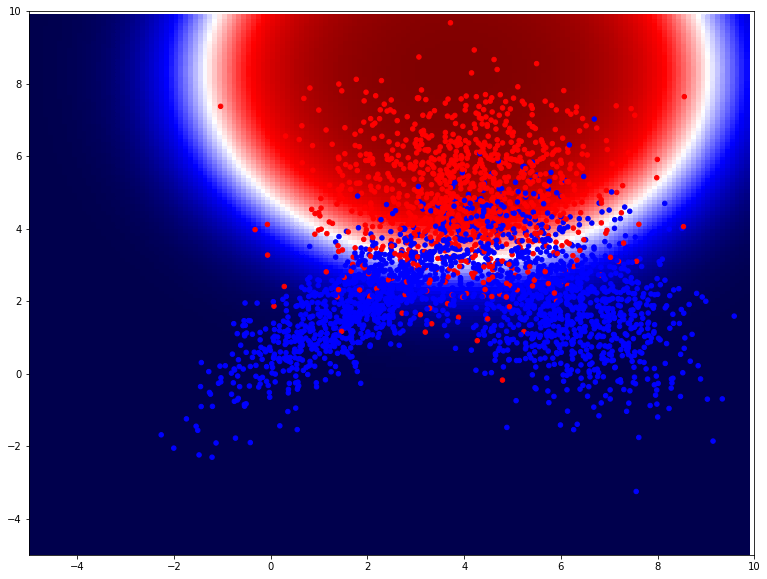

In [11]:
#ANSQ5


#/ANSQ5